This script plot the time series of VOC species measured through the RECAP campaign in Redlands

In [85]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import math
import os, importlib, sys

sys.path.append('../../code/src')
importlib.reload(sys.modules['measured_voc_concentration'])
from measured_voc_concentration import plot_time_series

In [49]:
df_VOC = pd.read_csv('../../data/raw/df_VOC_CARB_Chamber_DNPHcorrected.csv')
df_VOC['Sample date'] = pd.to_datetime(df_VOC['Sample date'])

c:\Users\Shenglun\OneDrive - University of California, Davis\Documents\LA_2021_summer\Repository\VOC_RECAP\code\script\../../code/src\measured_voc_concentration.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  return fig


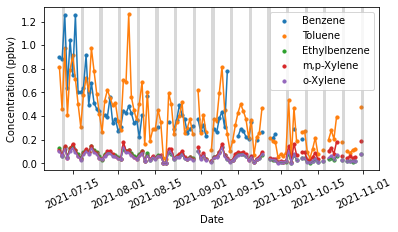

In [89]:
btex_list = ['Benzene', 'Toluene', 'Ethylbenzene', 'm,p-Xylene', 'o-Xylene']
fig = plot_time_series(df_VOC, btex_list)
#fig.savefig('../../result/time_series_btex.png', dpi=1200, 
#            bbox_inches='tight', facecolor='w')

c:\Users\Shenglun\OneDrive - University of California, Davis\Documents\LA_2021_summer\Repository\VOC_RECAP\code\script\../../code/src\measured_voc_concentration.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  return fig


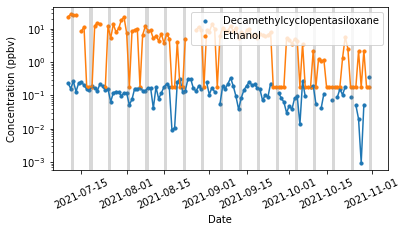

In [92]:
siloxane_list = ['Decamethylcyclopentasiloxane','Ethanol']
fig = plot_time_series(df_VOC, siloxane_list)
plt.legend(loc='upper right')
# log scale
plt.yscale('log')
#plt.ylim(0, 0.4)

# Test seasonal trend

In [111]:
# calculate linear regression to value
df_trend = pd.DataFrame(columns=['Parameter','slope','intercept'], index=range(97))
k = len(df_VOC.loc[df_VOC['Type']=='VOC','Parameter'].unique())

for i in range(k):
    voc = df_VOC.loc[df_VOC['Type']=='VOC','Parameter'].unique()[i]
    df_VOC_sub = df_VOC[df_VOC['Parameter'] == voc].reset_index(drop=True)
    df_VOC_sub = df_VOC_sub[df_VOC_sub['Value']>0]
    x = df_VOC_sub.index
    y = df_VOC_sub['Value']
    slope, intercept, r_value, p_value, std_err = st.linregress(x,y)
    df_trend.loc[i,'Parameter'] = voc
    df_trend.loc[i,'slope'] = slope
    df_trend.loc[i,'intercept'] = intercept
    df_trend.loc[i,'r_value'] = r_value
    df_trend.loc[i,'p_value'] = p_value
    df_trend.loc[i,'std_err'] = std_err

In [113]:
df_trend[(df_trend['p_value']<0.05)&(df_trend['slope']<0)].shape

(36, 6)